In [6]:
import math
import numpy
from matplotlib import pyplot
N = 200                               # Number of points in each direction
x_start, x_end = -50.0, 200.0            # x-direction boundaries
y_start, y_end = -50.0, 50.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Matplotlib is building the font cache; this may take a moment.


In [7]:
numpy.shape(X)

(200, 200)

In [8]:
u_inf = 20.0        # freestream speed

# compute the freestream velocity field
u_freestream = u_inf * numpy.ones_like(X)
v_freestream = numpy.zeros_like(X)

# compute the stream-function
psi_freestream = u_inf * Y

In [9]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [10]:
??get_velocity


Signature: get_velocity(strength, xs, ys, X, Y)
Source:   
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.

    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)

    return u, v
File:      /tmp/xpython_42/3761943954.py
Type:      function

In [11]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

In [12]:
strength_source = 1600
q=strength_source
x_source, y_source = 0.0, 0.0   # location of the source

u_source = strength_source / (2 * numpy.pi) * (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2)
v_source = strength_source / (2 * numpy.pi) * (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2)
psi_source = strength_source / (2 * numpy.pi) * numpy.arctan2(Y - y_source, X - x_source)


Maximum velocity outside the body: V_max = 25.185 m/s
At location: x = 12.81, y = 25.88


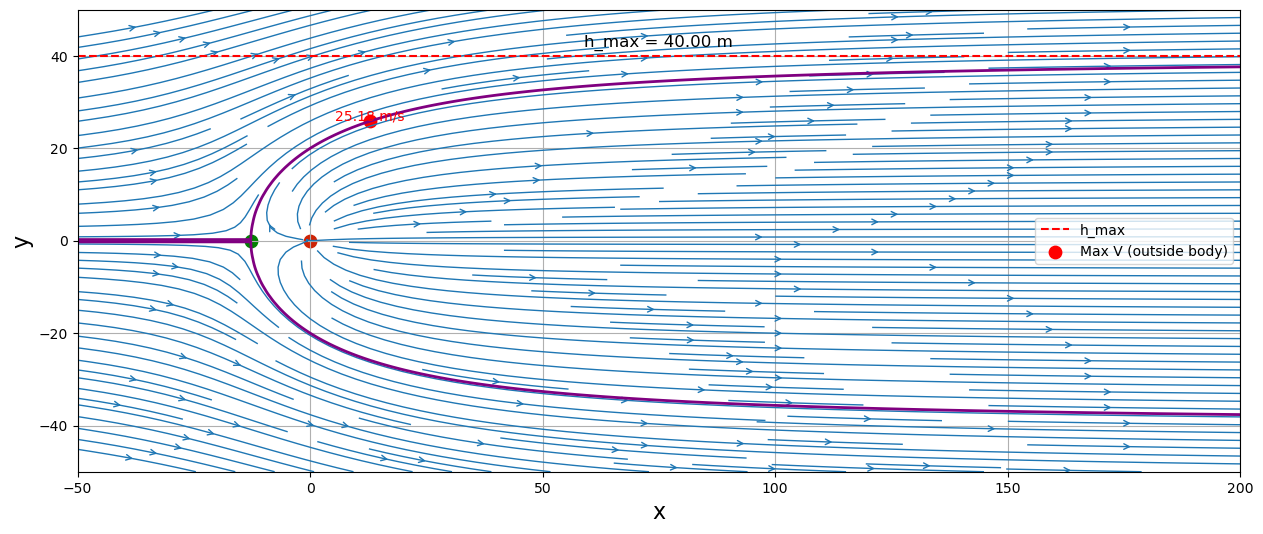

In [13]:
# superposition of the source on the freestream
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

# plot the streamlines
width = 15
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

# calculate the stagnation point
x_stagnation = x_source - strength_source / (2 * numpy.pi * u_inf)
y_stagnation = y_source

# display the stagnation point
pyplot.scatter(x_stagnation, y_stagnation, color='g', s=80, marker='o')

# display the dividing streamline
pyplot.contour(X, Y, psi, 
               levels=[-strength_source / 2, strength_source / 2], 
               colors='purple', linewidths=2, linestyles='solid');

h_max = strength_source / (2 *  u_inf)
#pyplot.scatter(200, h_max, color='red', s=80, label='h_max')
pyplot.axhline(y=h_max,color='red', linestyle='--', linewidth=1.5, label='h_max')
pyplot.text(75, h_max + 2, f'h_max = {h_max:.2f} m', ha='center', fontsize=12)

# קו הזרם של גוף רנקין
psi_body = q / 2

# מסכה: רק נקודות שבהן psi < q/2 → מחוץ לגוף
outside_body = psi > psi_body

# מהירויות באזורים שמחוץ לגוף
V = numpy.sqrt(u**2 + v**2)
V_outside = numpy.where(outside_body, V, -numpy.inf)
V_max = numpy.max(V_outside)

# מיקום המהירות המקסימלית
max_index = numpy.unravel_index(numpy.argmax(V_outside), V.shape)
x_max = X[max_index]
y_max = Y[max_index]

# תצוגה
print(f"Maximum velocity outside the body: V_max = {V_outside[max_index]:.3f} m/s")
print(f"At location: x = {x_max:.2f}, y = {y_max:.2f}")

# סימון על הגרף
pyplot.scatter(x_max, y_max, color='red', s=80, label='Max V (outside body)')
pyplot.text(x_max, y_max + 0.1, f'{V_outside[max_index]:.2f} m/s', color='red', ha='center')
pyplot.legend()

In [14]:
#strength_sink = -1600.0        # strength of the sink
#x_sink, y_sink = 1.0, 0.0   # location of the sink

# compute the velocity field on the mesh grid
#u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the grid mesh
#psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)

In [15]:
# superposition of a source and a sink on the freestream
#u = u_freestream + u_source + u_sink
#v = v_freestream + v_source + v_sink
#psi = psi_freestream + psi_source + psi_sink

# plot the streamlines
#width = 10
#height = (y_end - y_start) / (x_end - x_start) * width
#pyplot.figure(figsize=(width, height))
#pyplot.xlabel('x', fontsize=16)
#pyplot.ylabel('y', fontsize=16)
#pyplot.xlim(x_start, x_end)
#pyplot.ylim(y_start, y_end)
#pyplot.streamplot(X, Y, u, v,
#                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
#pyplot.scatter([x_source, x_sink], [y_source, y_sink],
#               color='#CD2305', s=80, marker='o')
#pyplot.contour(X, Y, psi,
 #              levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');

Maximum velocity outside the body: V_max = 25.185 m/s
At location: x = 12.81, y = 25.88


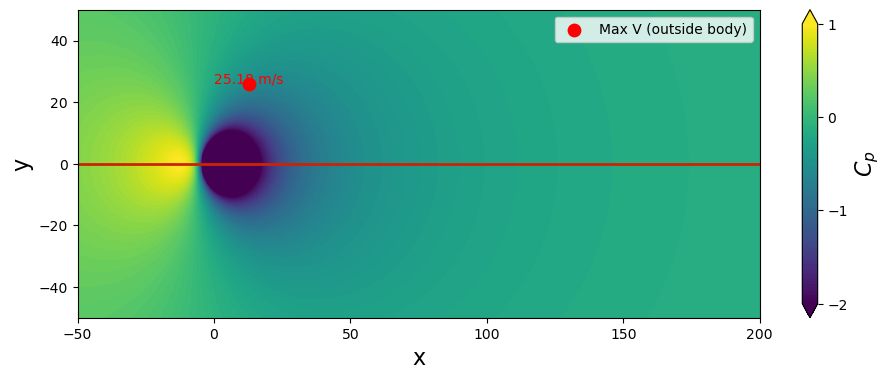

In [16]:
# compute the V
V = numpy.sqrt(u**2 + v**2)
# compute the pressure coefficient field
cp = 1.0 - (V / u_inf)**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

c=pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid');


# קו הזרם של גוף רנקין
psi_body = q / 2

# מסכה: רק נקודות שבהן psi < q/2 → מחוץ לגוף
outside_body = psi > psi_body

# מהירויות באזורים שמחוץ לגוף
V = numpy.sqrt(u**2 + v**2)
V_outside = numpy.where(outside_body, V, -numpy.inf)
V_max = numpy.max(V_outside)

# מיקום המהירות המקסימלית
max_index = numpy.unravel_index(numpy.argmax(V_outside), V.shape)
x_max = X[max_index]
y_max = Y[max_index]

# תצוגה
print(f"Maximum velocity outside the body: V_max = {V_max:.3f} m/s")
print(f"At location: x = {x_max:.2f}, y = {y_max:.2f}")

# סימון על הגרף
pyplot.scatter(x_max, y_max, color='red', s=80, label='Max V (outside body)')
pyplot.text(x_max, y_max + 0.1, f'{V_max:.2f} m/s', color='red', ha='center')
pyplot.legend()




In [17]:
# קו הזרם של הגוף
psi_body = q / 2

# רגישות כלי לאתר נקודות קרובות לקו הזרם של הגוף
on_surface = numpy.abs(psi - psi_body) < 1e-6  # סינון נקודות הקרובות לגבול הגבעה

# לארגן לפי המיקום על הגבעה, x ו־V ו־Cp
x_surface = X[on_surface]
V_surface = V[on_surface]
Cp_surface = cp[on_surface]

# כדי שהגרף לא יהיה מבולגן נמיין לפי x
sorted_indices = numpy.argsort(x_surface)
x_surface_sorted = x_surface[sorted_indices]
V_surface_sorted = V_surface[sorted_indices]
Cp_surface_sorted = Cp_surface[sorted_indices]



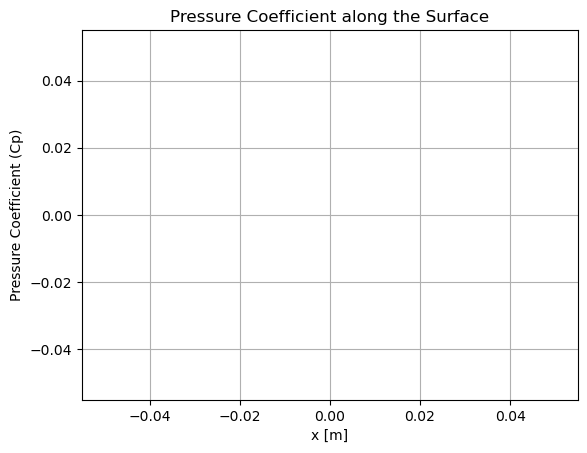

In [18]:
pyplot.figure()
pyplot.plot(x_surface_sorted, Cp_surface_sorted)
pyplot.xlabel("x [m]")
pyplot.ylabel("Pressure Coefficient (Cp)")
pyplot.title("Pressure Coefficient along the Surface")
pyplot.grid(True)


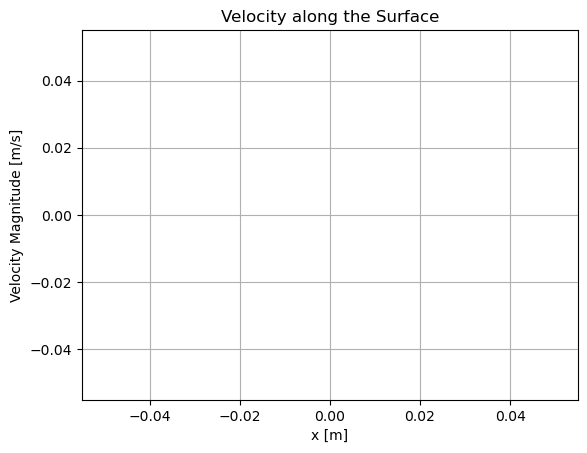

In [19]:
pyplot.figure()
pyplot.plot(x_surface_sorted, V_surface_sorted)
pyplot.xlabel("x [m]")
pyplot.ylabel("Velocity Magnitude [m/s]")
pyplot.title("Velocity along the Surface")
pyplot.grid(True)


In [20]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # creates a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # creates a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
kappa = 1.0                        # strength of the doublet
x_doublet, y_doublet = 0.0, 0.0    # location of the doublet

In [21]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns the velocity field generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)

    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns the stream-function generated by a doublet.

    Parameters
    ----------
    strength: float
        Strength of the doublet.
    xd: float
        x-coordinate of the doublet.
    yd: float
        y-coordinate of the doublet.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)

    return psi

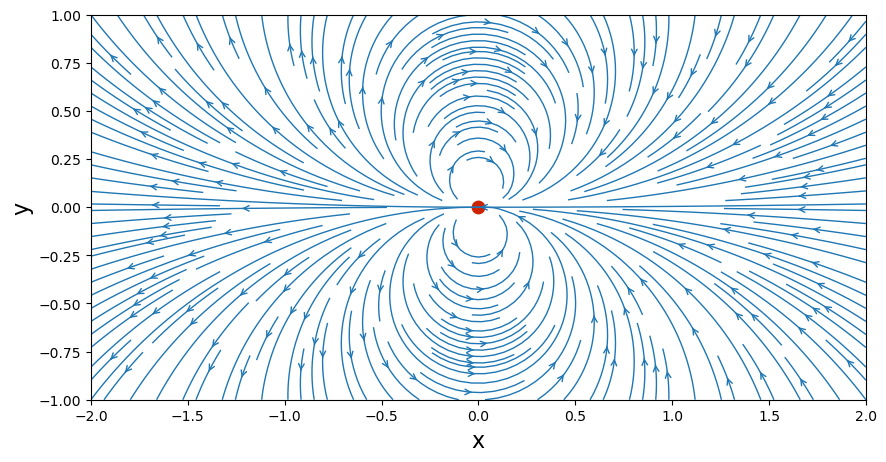

In [22]:
# compute the velocity field on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)

# compute the stream-function on the mesh grid
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)
# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');

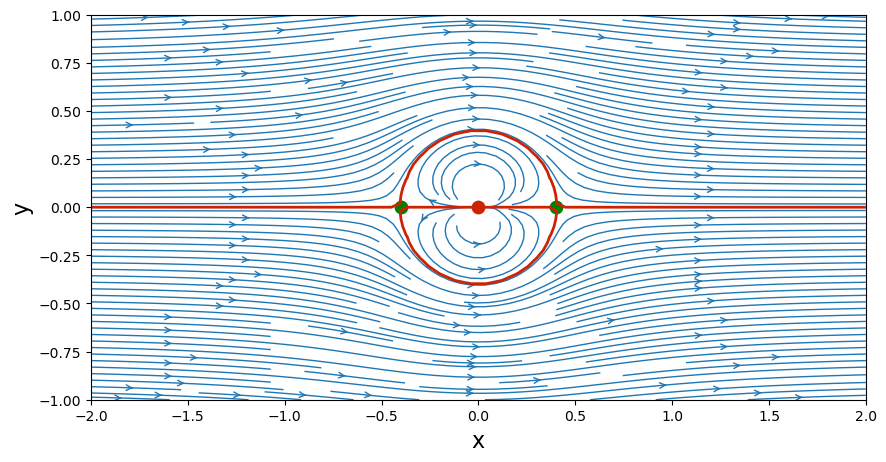

In [23]:
u_inf = 1.0        # freestream speed
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

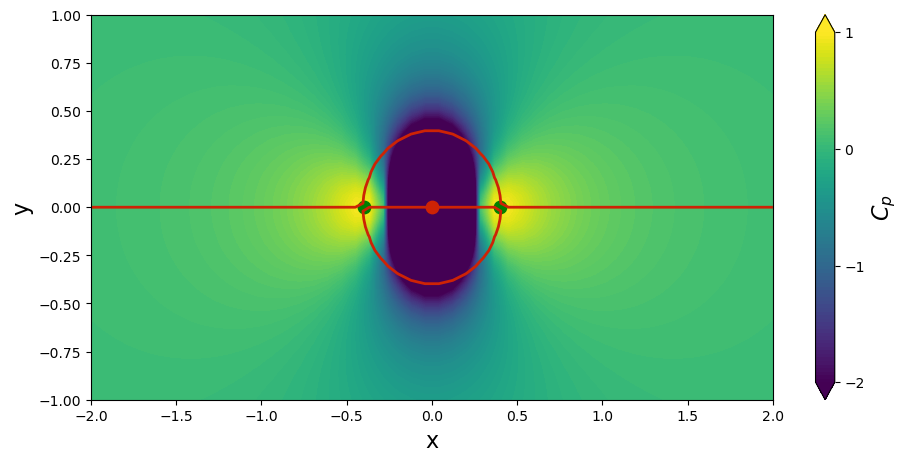

In [24]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');


In [25]:
N = 200# Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0,0.0   # location of the vortex



In [26]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)

    return u, v
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.

    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * numpy.log((X - xv)**2 + (Y - yv)**2)

    return psi


In [27]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex= get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)


# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

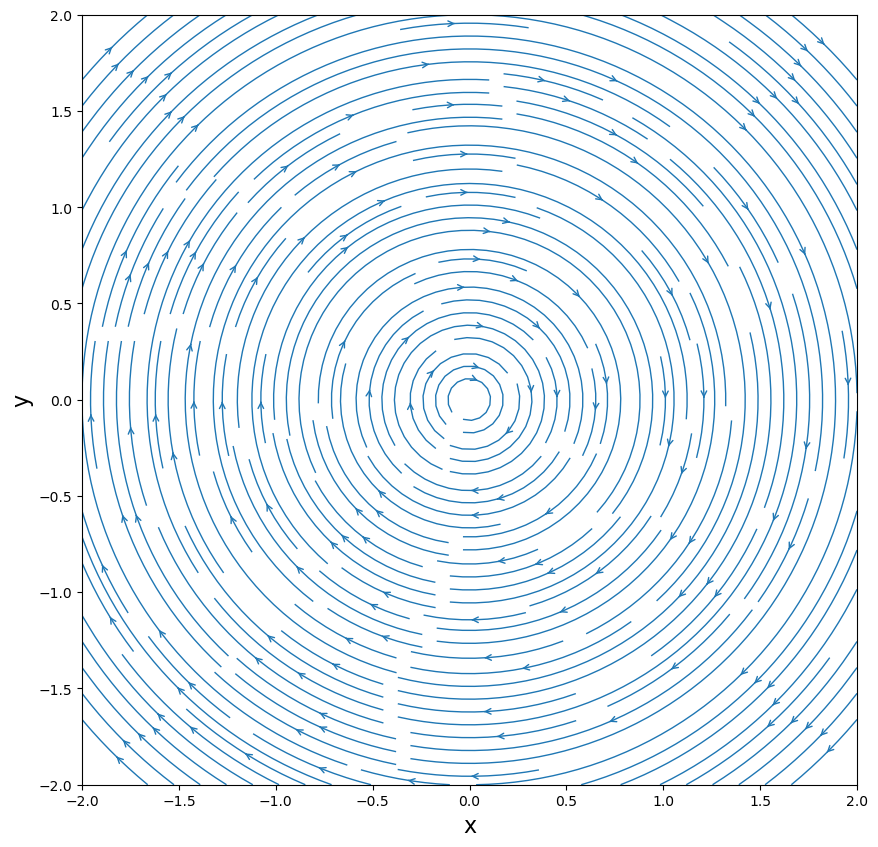

In [28]:
# plot the streamlines
u=u_vortex
v=v_vortex
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [29]:
strength_sink = -1.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0       # location of the sink
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)

    return u, v
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.

    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.

    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * math.pi) * numpy.arctan2((Y - ys), (X - xs))

    return psi
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

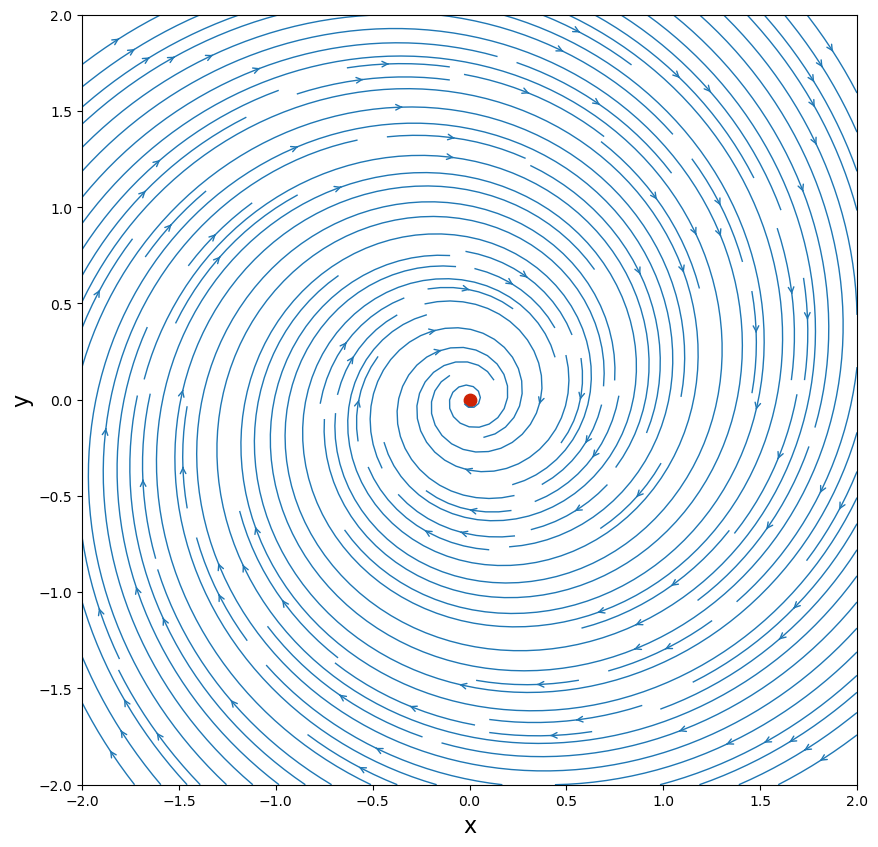

In [30]:
# superposition of the sink and the vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [31]:
print(psi.shape)
print(V.shape)


(200, 200)
(200, 200)


In [32]:
print(numpy.any(outside_body))  # האם יש בכלל נקודות מחוץ לגוף?
print(numpy.max(V))             # האם יש ערך סביר למהירות?
print(numpy.max(V_outside))     # האם זו לא -inf?


True
730.9307479576814
25.18473287550359
